In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta

data=pd.read_csv("/content/Nat_Gas.csv",parse_dates=True,index_col='Dates')
data.head()

,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2020-10-31 to 2024-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Prices  48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


*   The dataset has 48 records of Prices column in date range of 31 Oct 2020 - 9 Sept 2024



In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Prices,48.0,11.207083,0.757897,9.84,10.65,11.3,11.625,12.8


*     The Average price of natural gas is 11.2

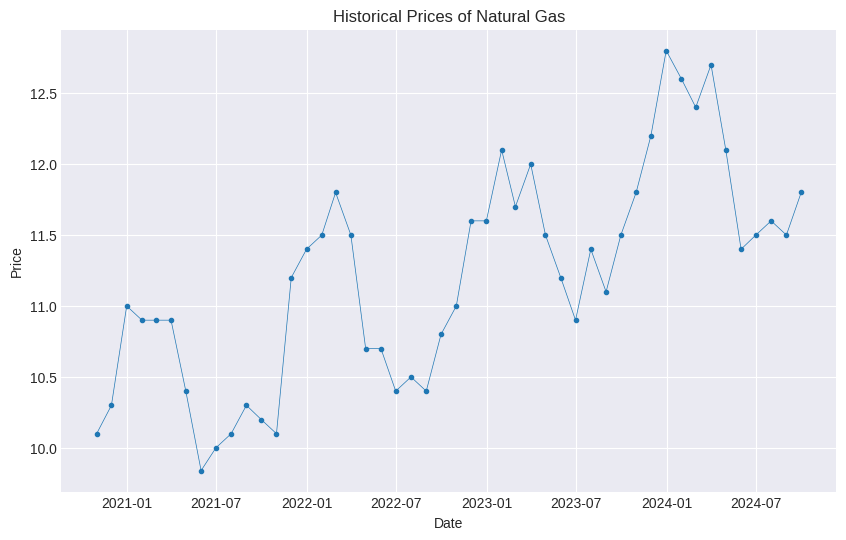

In [ ]:
plt.figure(figsize=(10, 6))
plt.style.use('seaborn-darkgrid')
plt.plot(data.index, data['Prices'], marker='.',linewidth= 0.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Historical Prices of Natural Gas')
plt.grid(True)
plt.show()

In [ ]:
# Time series analysis with ARIMA
model = ARIMA(data['Prices'], order=(1, 1, 1))
results = model.fit()
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# function for price estimation
def estimate_price_for_date(input_date):
    forecast_result = results.get_forecast(steps=(input_date - data.index[-1]).days // 30)
    return forecast_result.predicted_mean[input_date]

# Example usage
input_date = datetime(2025, 10, 31)
estimated_price = estimate_price_for_date(input_date)
print(f'Estimated price for {input_date}: {estimated_price}')

Estimated price for 2025-10-31 00:00:00: 11.839671650482728


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [50]:
def calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month):
    """
    Calculating the value of the contract based on input parameters.

    Parameters:
    - injection_dates: List of injection dates (datetime objects).
    - withdrawal_dates: List of withdrawal dates (datetime objects).
    - purchase_prices: List of purchase prices in $/MMBtu.
    - sale_prices: List of sale prices in $/MMBtu.
    - injection_rate: Injection rate in MMBtu.
    - max_volume: Maximum volume that can be stored in MMBtu.
    - storage_cost_per_month: Storage cost per month in $.

    Returns:
    - total_value: Total value of the contract in $.
    """

    # Error handling for input parameter consistency
    if len(injection_dates) != len(withdrawal_dates) != len(purchase_prices) != len(sale_prices):
        raise ValueError("Input lists must have the same length.")

    total_value = 0

    # Iterating through each injection and withdrawal pair
    for i in range(len(injection_dates)):
        injection_date = injection_dates[i]
        withdrawal_date = withdrawal_dates[i]
        purchase_price = purchase_prices[i]
        sale_price = sale_prices[i]

        # Validating logical order of dates
        if injection_date >= withdrawal_date:
            raise ValueError("Injection date must be before withdrawal date.")

        # Calculating the time between injection and withdrawal in months
        time_months = (withdrawal_date - injection_date).days / 30.44

        # Calculating the gas cost and sale revenue
        gas_cost = purchase_price * injection_rate * time_months
        sale_revenue = sale_price * injection_rate * time_months

        # Calculating storage costs
        storage_months = (withdrawal_date - injection_date).days / 30.44
        total_storage_cost = storage_cost_per_month * storage_months

        # Calculating total cost and value
        total_cost = gas_cost + total_storage_cost
        contract_value = sale_revenue - total_cost

        # Adding contract value to total
        total_value += contract_value

    return total_value

In [51]:
injection_dates = [pd.to_datetime('2023-05-15'), pd.to_datetime('2023-06-15')]
withdrawal_dates = [pd.to_datetime('2023-09-15'), pd.to_datetime('2023-11-15')]
purchase_prices = [2.5, 2.6]  # $/MMBtu
sale_prices = [3.5, 3.6]  # $/MMBtu
injection_rate = 1000000  # MMBtu
max_volume = 5000000  # MMBtu
storage_cost_per_month = 100000  # $

contract_value = calculate_contract_value(injection_dates, withdrawal_dates, purchase_prices, sale_prices, injection_rate, max_volume, storage_cost_per_month)
print(f"Estimated Contract Value: ${contract_value:.2f}")

Estimated Contract Value: $8160315.37
